# Hello Pandas [<img src="http://mybinder.org/badge.svg" align="right">](http://mybinder.org/repo/matr01/jupyter-hello?filepath=hello-pandas.ipynb)

inspired by https://gitlab.com/jan.kolomaznik/pydata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Získání seznamu měst v Česku podle počtu obyvatel

z wikipedia do DataFrame

\+ úprava formátovaných čísel a převod zpět na číslo

In [3]:
mesta = (pd.read_html("https://cs.wikipedia.org/wiki/Seznam_m%C4%9Bst_v_%C4%8Cesku_podle_po%C4%8Dtu_obyvatel")
         [0] # Data jsou v prvni tabulce
         .drop(columns=["Obrázek", "#"])
         .set_index("Článek"))
mesta['Počet obyvatel'] = mesta['Počet obyvatel'].str.replace(r"\s", "").astype(int)
mesta

,Počet obyvatel,Rozloha (km2),Okres
Článek,,,
Praha,1324277,49621,Praha
Brno,381346,23018,okres Brno-město
Ostrava,287968,21423,okres Ostrava-město
Plzeň,174842,13767,okres Plzeň-město
Liberec,104802,10609,okres Liberec
...,...,...,...
Janov,284,1103,okres Bruntál
Boží Dar,250,3791,okres Karlovy Vary
Rejštejn,247,3043,okres Klatovy


### Vykreslení počtu obyvatel měst

v logaritmické stupnici

<AxesSubplot:xlabel='Článek'>

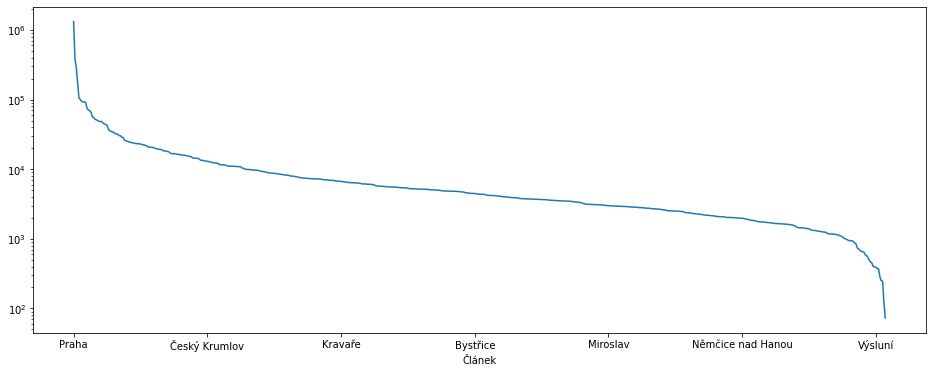

In [3]:
mesta['Počet obyvatel'].plot(figsize=(16,6),logy=True)

### Vykreslení histogramu velikosti měst

počet měst s počtem obyvatel v rozmezí od-do

s logaritmickými skupinami, v logaritmických stupnicích

<AxesSubplot:ylabel='Frequency'>

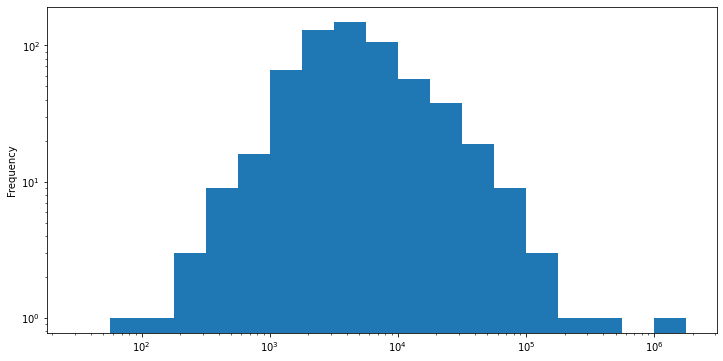

In [48]:
mesta['Počet obyvatel'].plot.hist(
    figsize=(12,6),bins=10**(np.arange(1.5,6.5,0.25)),logy=True,logx=True)

<AxesSubplot:xlabel='Počet obyvatel', ylabel='Rozloha (km2)'>

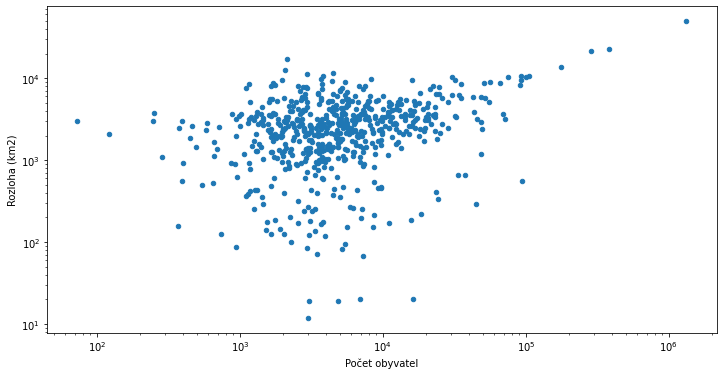

In [57]:
mesta.plot.scatter(x="Počet obyvatel",y="Rozloha (km2)",logy=True,logx=True,figsize=(12,6))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

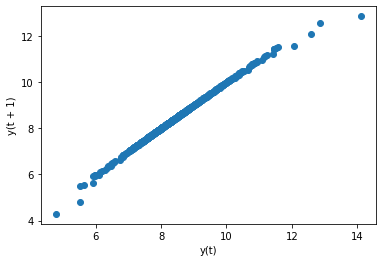

In [3]:
from pandas.plotting import lag_plot

lag_plot(np.log(mesta['Počet obyvatel']))

In [4]:
mesta.corr()

,Počet obyvatel,Rozloha (km2)
Počet obyvatel,1.000000,0.712348
Rozloha (km2),0.712348,1.000000


### Blood pressure monitor data

In [4]:
samples = pd.read_csv("data/sensor_data_pressure.csv")
samples

,time,pulse,sys,dias
0,2020-09-02 15:57:59.500000,65.0,120.0,80.0
1,2020-09-03 08:48:47.450000,95.0,120.0,90.0
2,2020-09-03 09:19:13.117000,256.0,1520.0,25.0
3,2020-09-03 09:21:24.435000,105.0,130.0,85.0
4,2020-09-04 14:09:40.547000,86.0,120.0,80.0
...,...,...,...,...
60,2020-09-09 11:47:55.000000,61.0,134.0,76.0
61,2020-09-09 11:49:33.000000,75.0,116.0,74.0
62,2020-09-09 11:52:31.000000,61.0,146.0,86.0
63,2020-09-09 12:34:39.000000,73.0,129.0,82.0


In [6]:
# filter out outliers (i.e. numbers more distant from the mean than three times the standard deviation)
samp = samples[np.abs(samples["sys"]-samples["sys"].mean()) <= (3*samples["sys"].std())]
samp.corr()

,pulse,sys,dias
pulse,1.000000,-0.329190,-0.339309
sys,-0.329190,1.000000,0.827567
dias,-0.339309,0.827567,1.000000


<AxesSubplot:>

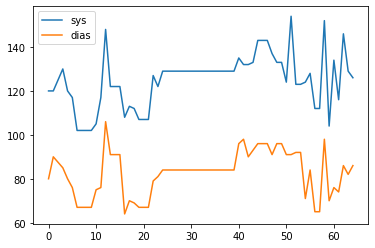

In [7]:
samp[["sys","dias"]].plot()

<AxesSubplot:xlabel='sys', ylabel='dias'>

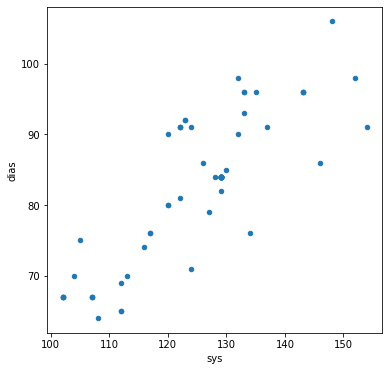

In [8]:
samp.plot.scatter(x="sys",y="dias",figsize=(6,6))

<AxesSubplot:ylabel='Frequency'>

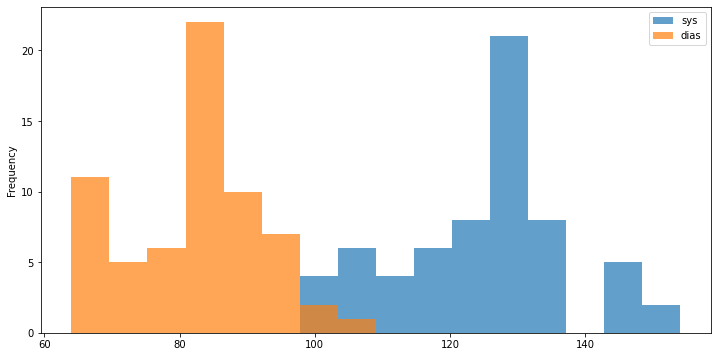

In [27]:
samp[["sys","dias"]].plot.hist(bins=16,alpha=0.7,figsize=(12,6))

In [31]:
samp[["sys","dias"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sys     64 non-null     float64
 1   dias    64 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [34]:
samp.describe()

,pulse,sys,dias
count,64.000000,64.000000,64.000000
mean,77.531250,124.828125,82.625000
std,8.956631,12.366820,10.217476
min,61.000000,102.000000,64.000000
25%,69.750000,117.000000,75.750000
50%,80.000000,129.000000,84.000000
75%,83.000000,129.250000,91.000000
max,105.000000,154.000000,106.000000
